# 1. Install and Import Dependencies

In [1]:
# MPS acceleration is available on MacOS 12.3+
!pip3 install torch torchvision torchaudio

  Using cached torch-2.0.0-cp39-none-macosx_10_9_x86_64.whl (139.8 MB)
  Using cached torchvision-0.15.1-cp39-cp39-macosx_10_9_x86_64.whl (1.5 MB)
  Using cached torchaudio-2.0.1-cp39-cp39-macosx_10_9_x86_64.whl (3.9 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached filelock-3.11.0-py3-none-any.whl (10.0 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached numpy-1.24.2-cp39-cp39-macosx_10_9_x86_64.whl (19.8 MB)
  Using cached Pillow-9.5.0-cp39-cp39-macosx_10_10_x86_64.whl (3.4 MB)
  Using cached MarkupSafe-2.1.2-cp39-cp39-macosx_10_9_x86_64.whl (13 kB)
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached charset_normalizer-3.1.0-cp39-cp39-macosx_10_9_x86_64.whl (124 kB)
You should consider upgrading via the

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15532, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 15532 (delta 51), reused 118 (delta 43), pack-reused 15393
Receiving objects: 100% (15532/15532), 14.59 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (10579/10579), done.


In [3]:
!cd yolov5 & pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
You should consider upgrading via the '/Users/zacharyporter/Desktop/MachineLearning/USB_Detection/YOLO-Drowsiness-Detection/USB/bin/python -m pip install --upgrade pip' command.


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/zacharyporter/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-17 Python-3.9.13 torch-2.0.0 CPU



requirements: /Users/zacharyporter/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 10.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

# 3. Make Detections with Images

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [4]:
import uuid   # Unique identifier
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['ports_open', 'usb_detected']
number_imgs = 10

In [10]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [11]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 3.34 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [12]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.9-cp37-abi3-macosx_10_13_x86_64.whl (7.0 MB)
  Using cached lxml-4.9.2-cp39-cp39-macosx_10_15_x86_64.whl (4.8 MB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-macosx_10_13_intel.whl (40.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 KB 2.3 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/zacharyporter/Desktop/MachineLearning/USB_Detection/YOLO-Drowsiness-Detection/USB/bin/python -m pip install --upgrade pip' command.


In [1]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /Users/zacharyporter/Desktop/MachineLearning/USB_Detection/YOLO-Drowsiness-Detection/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.13 torch-2.0.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       8/99         0G    0.09628    0.02999    0.06241          8        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.694      0.319      0.309     0.0581

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/99         0G    0.08871    0.02602    0.05453          4        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20       0.83       0.25       0.25     0.0408

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/99         0G    0.09341    0.03005    0.05534          9        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.886        0.3      0.312     0.0738

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      33/99         0G    0.07507    0.01848    0.03028          8        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20       0.35      0.686      0.525       0.12

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      34/99         0G    0.07182    0.01963    0.03281          6        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.488      0.585      0.587      0.323

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      35/99         0G    0.06402    0.02193    0.03209         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.527      0.616      0.661      0.196

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      58/99         0G    0.06483    0.01974    0.02159         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.236      0.869      0.417      0.123

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      59/99         0G    0.05875    0.01756    0.01887         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20       0.61        0.9      0.809      0.413

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      60/99         0G    0.05983    0.01895    0.01715         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20       0.61        0.9      0.809      0.413

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      83/99         0G    0.04012      0.011    0.00916          4        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.816          1      0.965      0.613

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      84/99         0G    0.03962    0.01266   0.009902          7        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.816          1      0.965      0.613

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      85/99         0G    0.03963    0.01106     0.0111          5        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         20         20      0.932          1      0.981      0.604

      Epo

# 6. Load Custom Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/zacharyporter/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-17 Python-3.9.13 torch-2.0.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


requirements: /Users/zacharyporter/.cache/torch/hub/requirements.txt not found, check failed.


In [6]:
img = os.path.join('data', 'images', 'usb_detected.39fc1d86-dd27-11ed-aa9e-acde48001122.jpg')

In [7]:
results = model(img)

In [8]:
results.print()

image 1/1: 1080x1920 1 usb_detected
Speed: 45.4ms pre-process, 80.9ms inference, 0.9ms NMS per image at shape (1, 3, 384, 640)


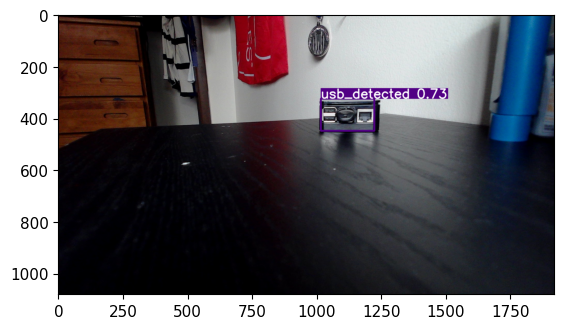

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()